# <font color='#FFE15D'>**Sleep and Lifestyle Analysis**</font>

## 🔸 Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 🔸 Load Dataset

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## 🔸 Preprocessing

In [4]:
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

In [5]:
df.drop('Person ID', axis=1, inplace=True)

In [6]:
for col in df.columns:
    print(col, df[col].nunique())

Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [7]:
df['Blood Pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: Blood Pressure, Length: 374, dtype: object

In [8]:
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])

df.drop('Blood Pressure', axis=1, inplace=True)

In [100]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90


## **🔸 Exploratory Data Analysis (EDA)**

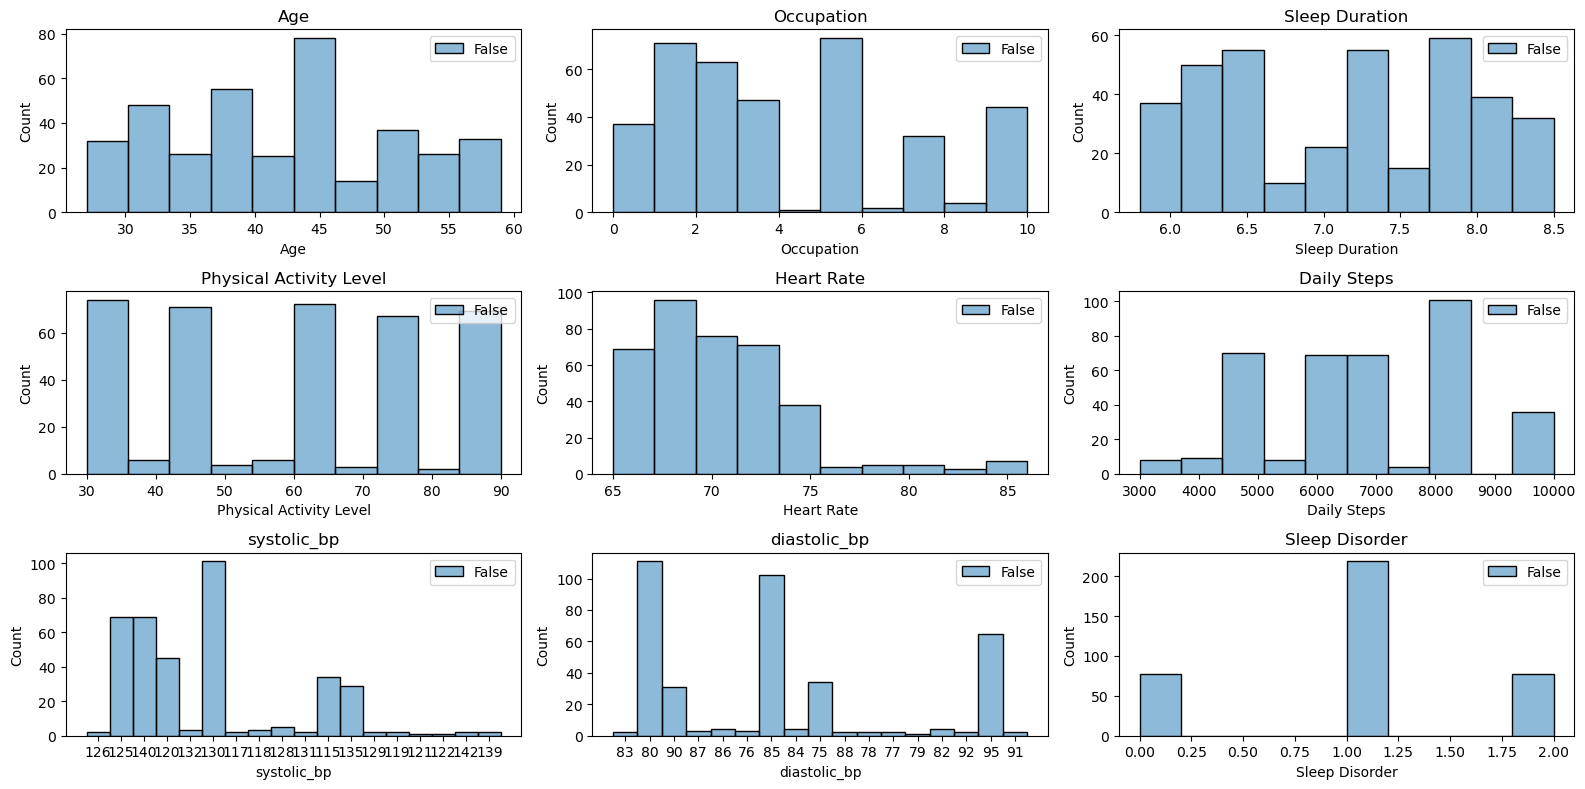

In [109]:
cols = ['Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'systolic_bp', 'diastolic_bp', 'Sleep Disorder']

fig, axes = plt.subplots(3, 3, figsize=(16, 8))

for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    sns.histplot(x=col, data=df, ax=ax, bins=10, hue=False)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()    

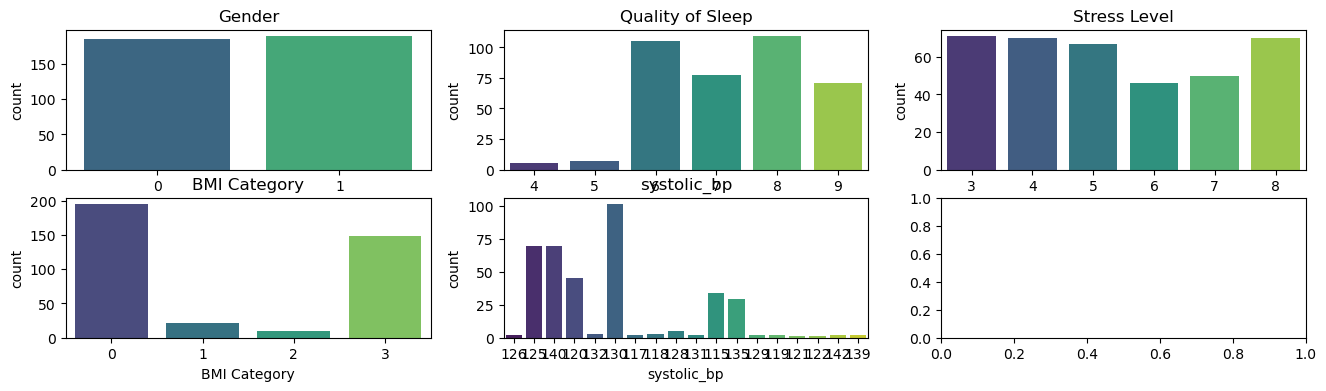

In [106]:
cols = ['Gender', 'Quality of Sleep', 'Stress Level', 'BMI Category']
fig, axes = plt.subplots(2, 3, figsize=(16, 4))

for i, col in enumerate(cols):
    ax = axes[i//3, i%3]    
    sns.countplot(x=col, data=df, palette='viridis', ax=ax)
    ax.set_title(col)

<Axes: xlabel='Gender', ylabel='count'>

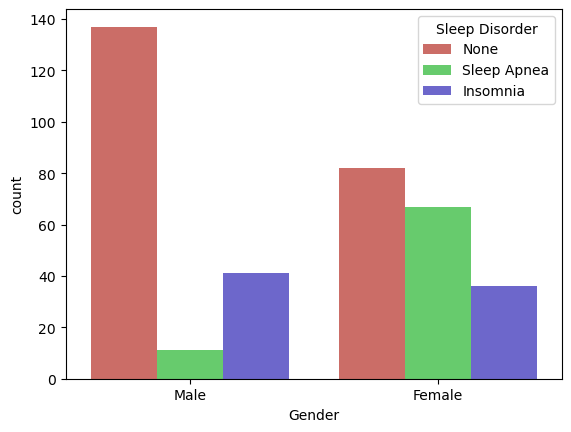

In [15]:
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder')

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

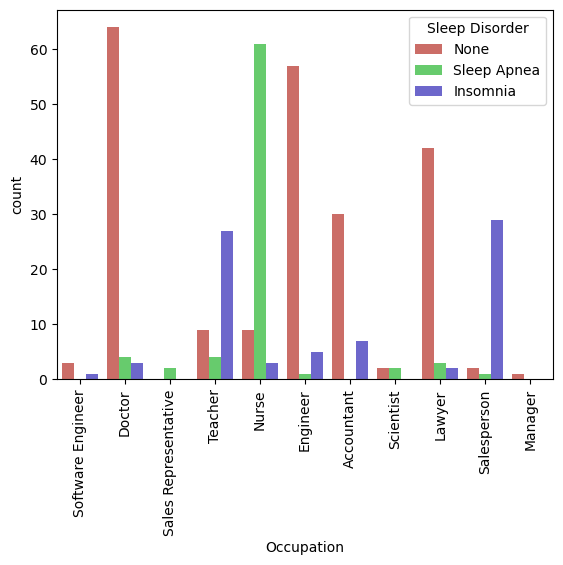

In [16]:
ax = sns.countplot(x = 'Occupation', data = df, palette = 'hls', hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

<Axes: xlabel='BMI Category', ylabel='count'>

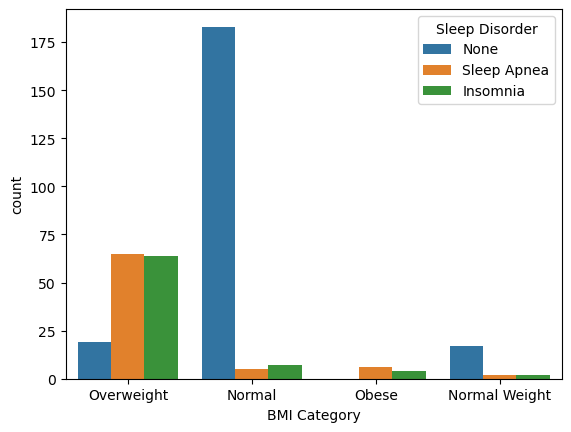

In [17]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df)

####

In [18]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
systolic_bp                 object
diastolic_bp                object
dtype: object

## **🔸 Data Preprocessing part 2**

In [19]:
label_encoder = preprocessing.LabelEncoder()

In [21]:
cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in cols:
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(col, ':', df[col].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [3 0 2 1]
Sleep Disorder : [1 2 0]


C:\Users\FGN\AppData\Local\Temp\ipykernel_3040\4250243122.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

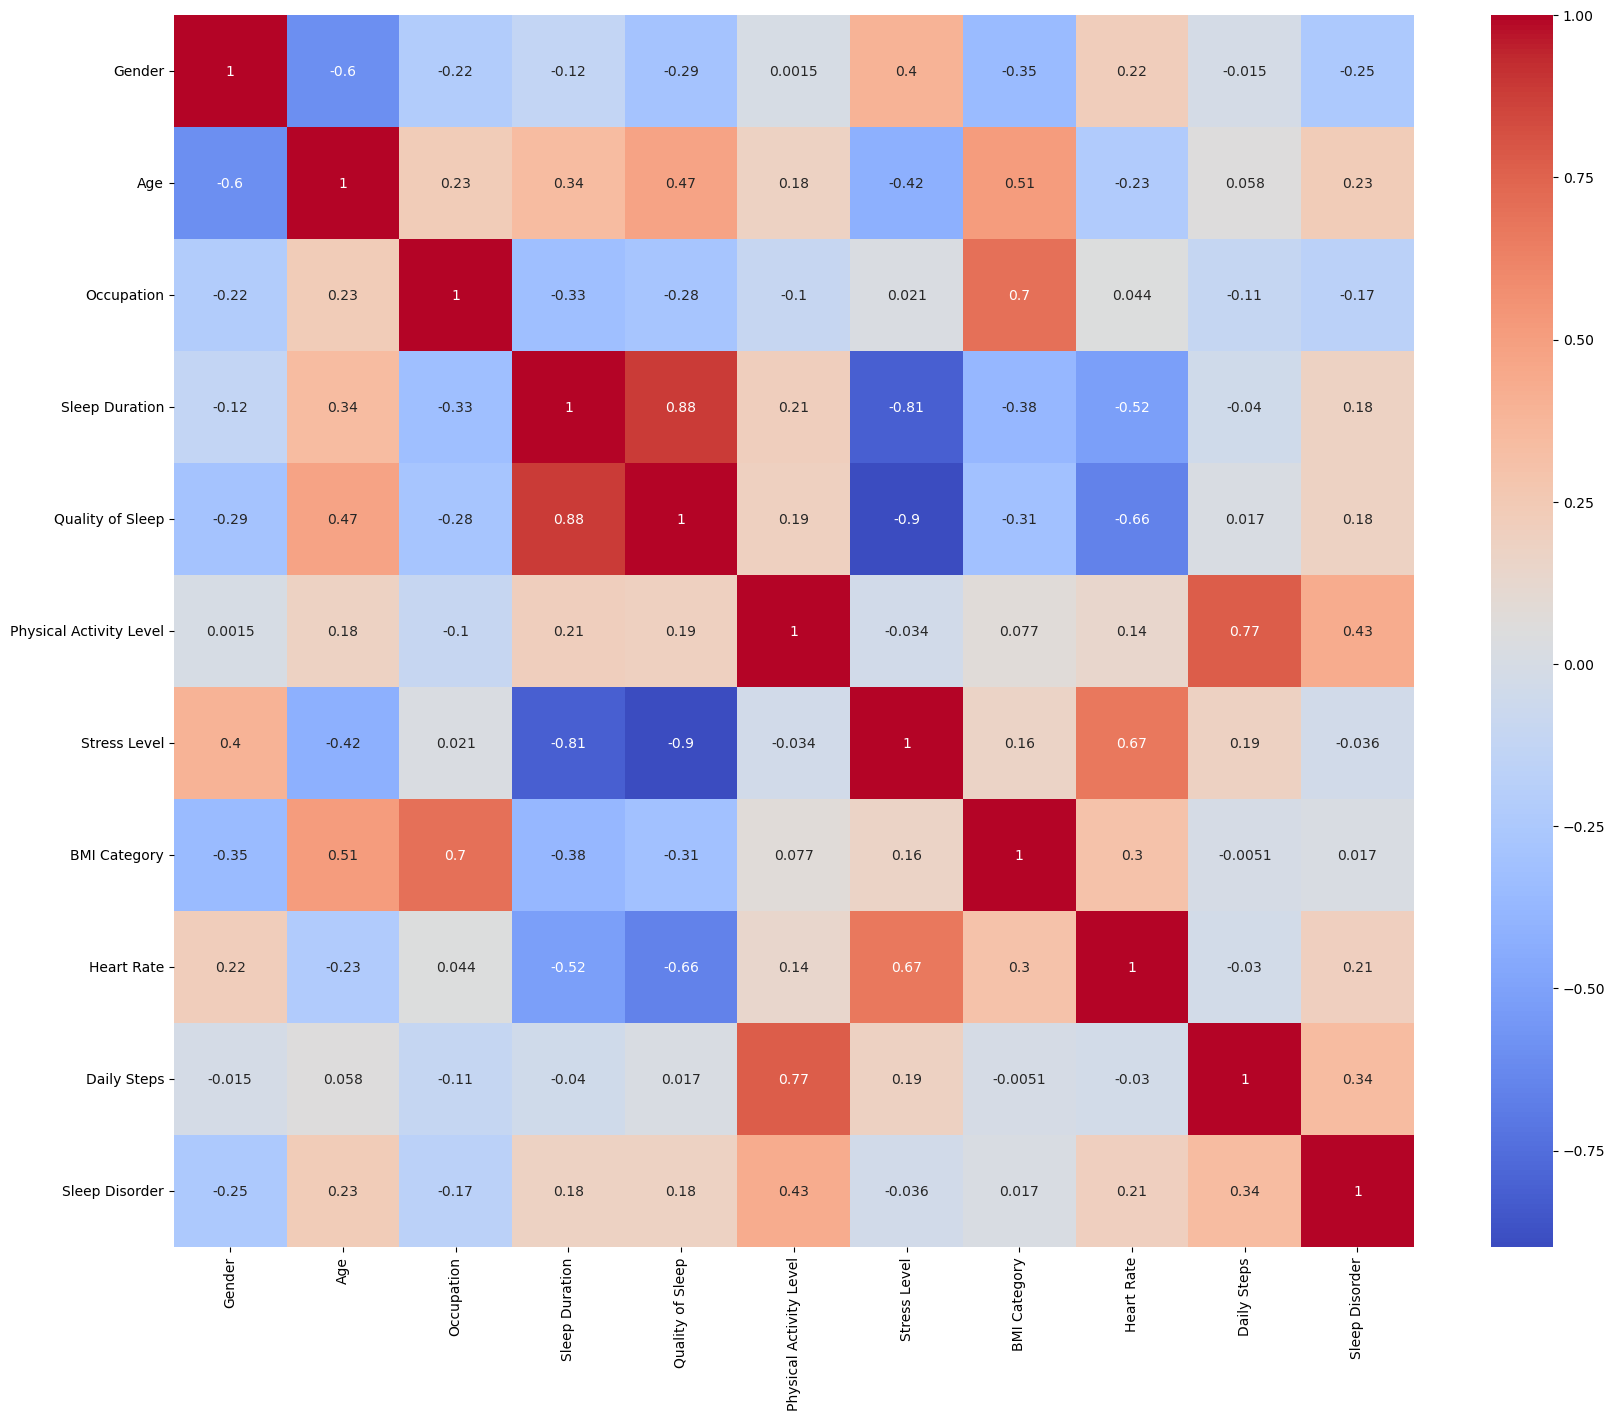

In [22]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### Train Test Split

In [25]:
y = df['Sleep Disorder']
X = df.drop(columns='Sleep Disorder')

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **🔸 Model Training**

### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=42, ccp_alpha=0.001)

In [56]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, random_state=42)

In [82]:
dtree.score(x_train, y_train)

0.9331103678929766

In [84]:
dpred = dtree.predict(x_test)

## **🔸 Evaluation**

In [59]:
from sklearn.metrics import confusion_matrix

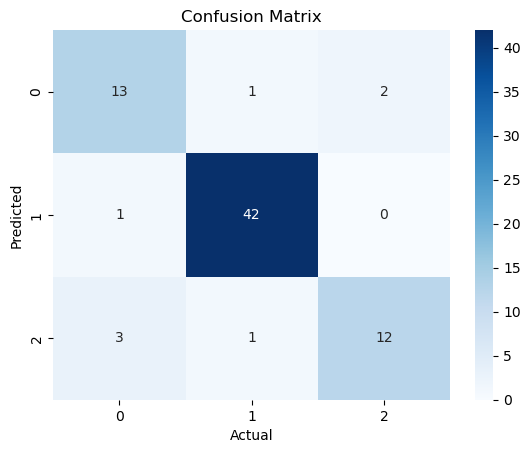

In [64]:
sns.heatmap(confusion_matrix(y_test, dpred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [77]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
rfc.score(x_train, y_train)

0.9331103678929766

In [88]:
rpred = rfc.predict(x_test)

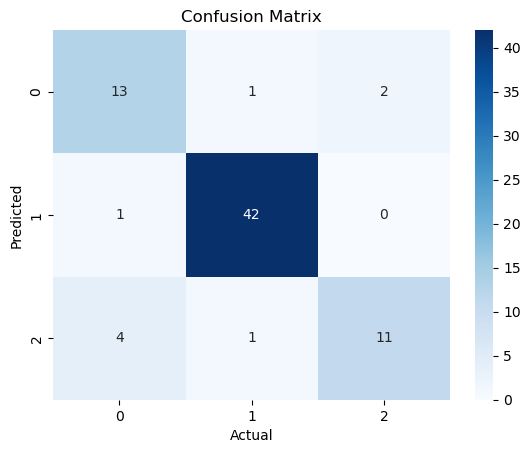

In [89]:
sns.heatmap(confusion_matrix(y_test, rpred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

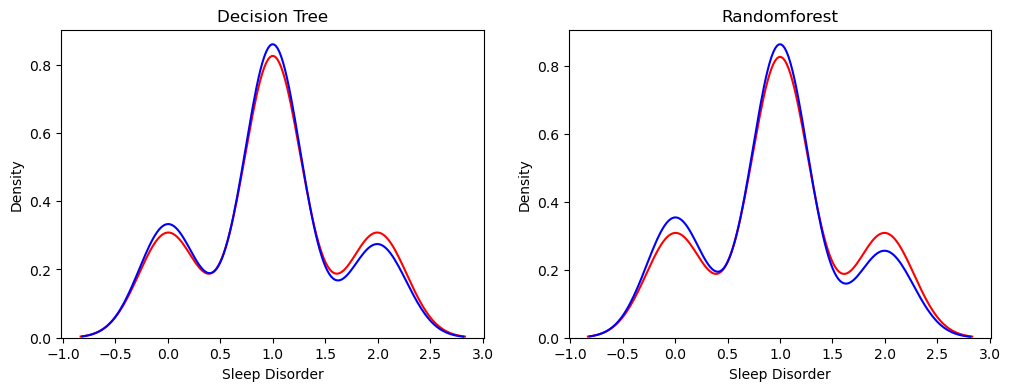

In [99]:
models = {'Decision Tree' : dpred, 'Randomforest': rpred}
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i, model_name in enumerate(models):
    sns.kdeplot(y_test, color='r', ax=ax[i]).set_title(model_name)
    sns.kdeplot(models[model_name], color='b', ax=ax[i])